<a href="https://colab.research.google.com/github/Archanasoner/Machine-Learning-Labs/blob/main/CNN%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MANUAL INTERPRETATION OF THE CNN MODEL USING WASTE CLASSIFICATION DATASET

# Downloading and unzipping the datset

In [1]:
import os

os.environ['KAGGLE_API_TOKEN'] = 'KGAT_942dac81771aee515b5c3816c8f78d00'


In [2]:
!pip install kaggle


In [3]:
!pip uninstall -y kaggle


Found existing installation: kaggle 1.8.3
Uninstalling kaggle-1.8.3:
  Successfully uninstalled kaggle-1.8.3


In [4]:
!pip install -U kaggle


  Using cached kaggle-1.8.3-py3-none-any.whl.metadata (16 kB)
Using cached kaggle-1.8.3-py3-none-any.whl (102 kB)


In [5]:
import os
os.environ['KAGGLE_API_TOKEN'] = 'KGAT_942dac81771aee515b5c3816c8f78d00'


In [6]:
!kaggle -v


Kaggle API 1.8.3


In [7]:
!kaggle competitions list


ref                                                                              deadline             category          reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3    2026-04-15 23:59:00  Featured   2,207,152 Usd        939           False  
https://www.kaggle.com/competitions/passenger-screening-algorithm-challenge      2017-12-15 23:59:00  Featured   1,500,000 Usd        518           False  
https://www.kaggle.com/competitions/zillow-prize-1                               2018-01-10 15:59:00  Featured   1,200,000 Usd       3770           False  
https://www.kaggle.com/competitions/data-science-bowl-2017                       2017-04-12 23:59:00  Featured   1,000,000 Usd       1972           False  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detec

In [8]:
!kaggle datasets download -d techsash/waste-classification-data


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
waste-classification-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip waste-classification-data.zip -d waste_dataset


Archive:  waste-classification-data.zip
replace waste_dataset/DATASET/TEST/O/O_12568.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
import os
os.listdir("waste_dataset")


['dataset', 'DATASET']

In [11]:
import os

os.listdir("waste_dataset/DATASET")


['TEST', 'TRAIN']

# Data Loading code

In [34]:
import tensorflow as tf

train_path = "waste_dataset/DATASET/TRAIN"
test_path = "waste_dataset/DATASET/TEST"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(128, 128),
    batch_size=32,
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(128, 128),
    batch_size=32,
    shuffle=False
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.
Classes: ['O', 'R']


# Normalising the images

In [13]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


# Build CNN model

In [29]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal", input_shape=(128, 128, 3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Train

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.6586 - loss: 0.6054 - val_accuracy: 0.8273 - val_loss: 0.4052
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.7695 - loss: 0.4899 - val_accuracy: 0.7919 - val_loss: 0.4400
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.7767 - loss: 0.4826 - val_accuracy: 0.8440 - val_loss: 0.3899
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.7776 - loss: 0.4771 - val_accuracy: 0.8452 - val_loss: 0.3818
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.7842 - loss: 0.4678 - val_accuracy: 0.8392 - val_loss: 0.4008
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.7807 - loss: 0.4714 - val_accuracy: 0.8452 - val_loss: 0.3776
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.7845 - loss: 0.4651 - val_accuracy: 0.8559 - val_loss: 0.3752
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.7894 - loss: 0.4615 - 

In [23]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.7981 - loss: 0.4402 - val_accuracy: 0.8675 - val_loss: 0.3475
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.7978 - loss: 0.4530 - val_accuracy: 0.8814 - val_loss: 0.3224
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.8018 - loss: 0.4355 - val_accuracy: 0.8762 - val_loss: 0.3364
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.8119 - loss: 0.4236 - val_accuracy: 0.8850 - val_loss: 0.3192
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.8122 - loss: 0.4191 - val_accuracy: 0.8715 - val_loss: 0.3252
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.8117 - loss: 0.4173 - val_accuracy: 0.8715 - val_loss: 0.3462
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.8114 - loss: 0.4176 - val_accuracy: 0.8894 - val_loss: 0.3021
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.8173 - loss: 0.4150 - 

Plot Accuracy and loss

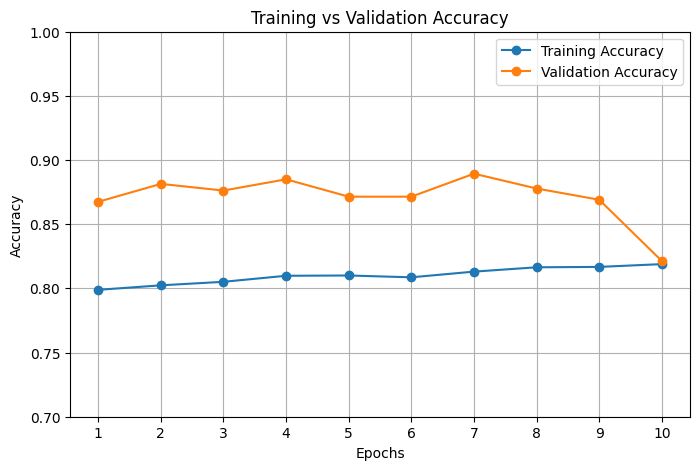

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], marker='o', label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xticks(epochs)
plt.ylim(0.7, 1.0)   # forces clear scale
plt.legend()
plt.grid(True)
plt.show()


# Loss Plot

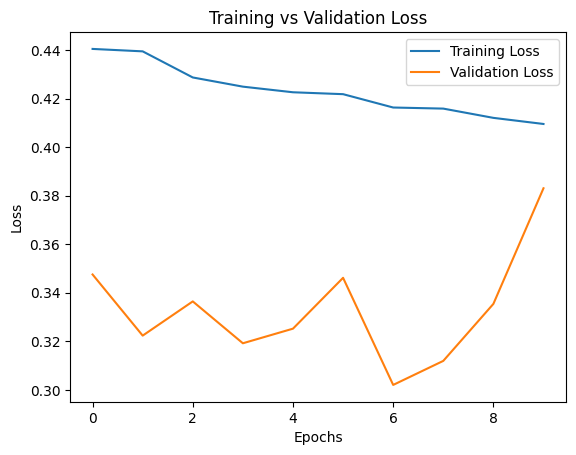

In [26]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


# Confusion Matrix

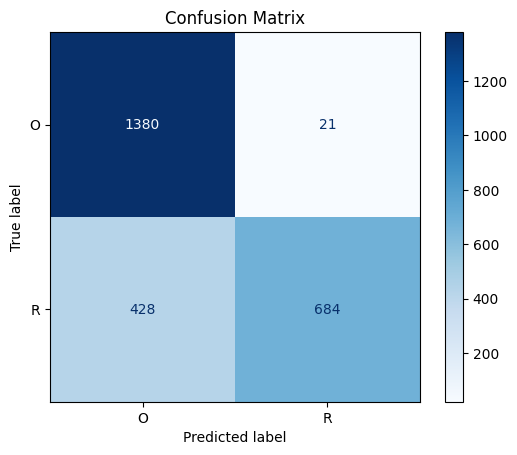

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


#Classification Report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=['Class 0', 'Class 1']
))


              precision    recall  f1-score   support

     Class 0       0.76      0.99      0.86      1401
     Class 1       0.97      0.62      0.75      1112

    accuracy                           0.82      2513
   macro avg       0.87      0.80      0.81      2513
weighted avg       0.85      0.82      0.81      2513



AI TOOL USAGE

# Used Grok to code the CNN Model

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,396,801 (73.99 MB)

 Trainable params: 19,395,841 (73.99 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 280s 481ms/step - accuracy: 0.7132 - loss: 3.1713 - val_accuracy: 0.7686 - val_loss: 0.4528 - learning_rate: 0.0010
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 263s 466ms/step - accuracy: 0.8087 - loss: 0.4674 - val_accuracy: 0.8165 - val_loss: 0.4321 - learning_rate: 0.0010
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 263s 466ms/step - accuracy: 0.8160 - loss: 0.4494 - val_accuracy: 0.8092 - val_loss: 0.4391 - learning_rate: 0.0010
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 265s 469ms/step - accuracy: 0.8256 - loss: 0.4270 - val_accuracy: 0.7888 - val_loss: 0.4249 - learning_rate: 0.0010
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 265s 468ms/step - accuracy: 0.8349 - loss: 0.4079 - val_accuracy: 0.7507 - val_loss: 0.5531 - learning_rate: 0.0010
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 263s 466ms/step - accuracy: 0.8405 - loss: 0.3944 - val_accuracy: 0.8187 - val_loss: 0.4301 - learning_rate: 0.0010
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 263s 465ms/step - accura

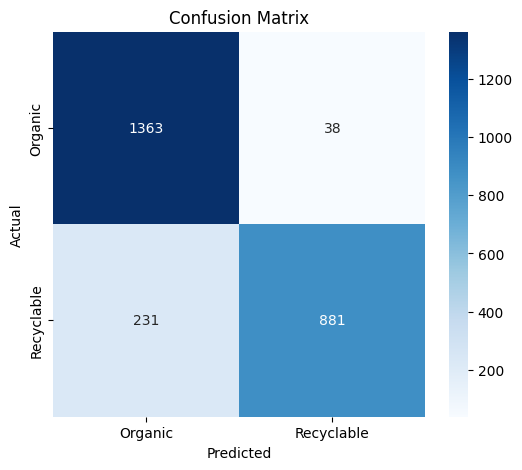

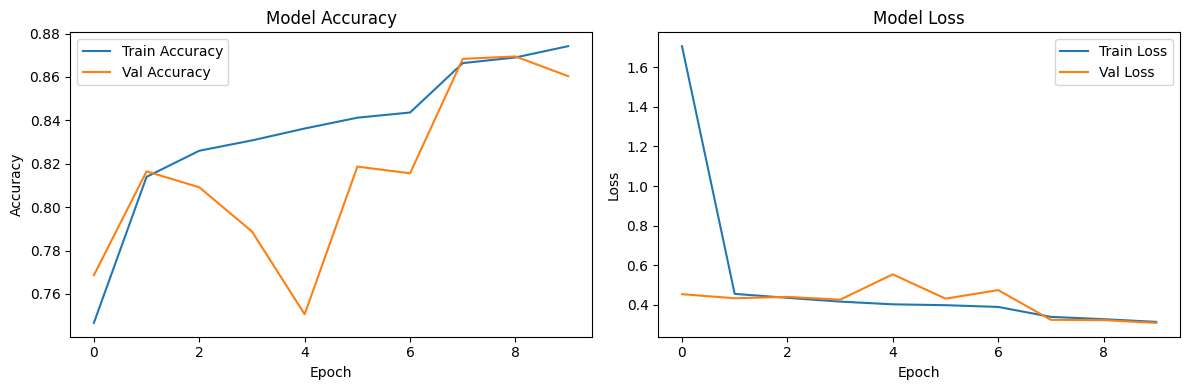

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Assume dataset is extracted to './dataset' with subfolders TRAIN and TEST
# Structure: dataset/TRAIN/O/, dataset/TRAIN/R/, dataset/TEST/O/, dataset/TEST/R/

train_dir = './waste_dataset/DATASET/TRAIN'
test_dir = './waste_dataset/DATASET/TEST'

# Image parameters
img_height, img_width = 224, 224
batch_size = 32

# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of train for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions for metrics
y_pred = (model.predict(test_generator) > 0.5).astype(int)
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=['Organic', 'Recyclable']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Organic', 'Recyclable'], yticklabels=['Organic', 'Recyclable'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()